Import libraries and modules

In [2]:
%pylab inline

import numpy as np
np.random.seed(123)  # for reproducibility

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Populating the interactive namespace from numpy and matplotlib


Load image data from MNIST

In [3]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


Shape of the dataset

In [5]:
print(X_train.shape)

(60000, 28, 28)


60,000 samples in the training set, and the images are 28 pixels x 28 pixels each. Plotting the first sample in matplotlib

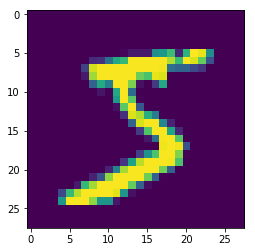

In [6]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

Preprocess input data for Keras. When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. For example, a full-color image with all 3 RGB channels will have a depth of 3. Our MNIST images only have a depth of 1, but we must explicitly declare that. In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

Show X_train's dimensions again

In [9]:
print( X_train.shape)

(60000, 1, 28, 28)


The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Preprocess class labels for Keras. Check shape of our class label data.

In [11]:
print( y_train.shape)

(60000,)


Convert 1-dimensional class arrays to 10-dimensional class matrices

In [12]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Check shape of our class label data again

In [13]:
print( Y_train.shape)

(60000, 10)


Define model architecture. Declaring a sequential model format

In [14]:
model = Sequential()

Declare the input layer which is (1, 28, 28) that corresponds to  the (depth, width, height) of each digit image

In [15]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

Shape of the current model output

In [16]:
print( model.output_shape)

(None, 32, 26, 26)


Add more layers to our model. For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

In [17]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Compile model. Declare the loss function and the optimizer (SGD, Adam, etc.).

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Fit model on training data. Declare the batch size and number of epochs to train for, then pass in training data

In [19]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 322s 5ms/step - loss: 0.2489 - acc: 0.9244
Epoch 2/10
60000/60000 [==============================] - 360s 6ms/step - loss: 0.0986 - acc: 0.9707
Epoch 3/10
60000/60000 [==============================] - 335s 6ms/step - loss: 0.0776 - acc: 0.9771
Epoch 4/10
60000/60000 [==============================] - 332s 6ms/step - loss: 0.0640 - acc: 0.9805
Epoch 5/10
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0540 - acc: 0.9835
Epoch 6/10
60000/60000 [==============================] - 247s 4ms/step - loss: 0.0487 - acc: 0.9849
Epoch 7/10
60000/60000 [==============================] - 249s 4ms/step - loss: 0.0433 - acc: 0.9863
Epoch 8/10
60000/60000 [==============================] - 248s 4ms/step - loss: 0.0378 - acc: 0.9879
Epoch 9/10
60000/60000 [==============================] - 250s 4ms/step - loss: 0.0370 - acc: 0.9880
Epoch 10/10
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0326 - a

Evaluate model on test data.

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)

Predict the image

In [22]:
Y_test = model.predict_classes(X_test, verbose=2)